Привет, Сергей! 

Меня зовут Светлана Медведева и я буду проверять Твою работу. Предлагаю общаться на "ты". Если Тебе такой вариант не удобен. то пожалуйста дай знать. Я сразу перейду на "Вы".

При обнаружении у Тебя в работе ошибки, в первый раз я лишь укажу на ее наличие и у Тебя будет возможность самому найти её и исправить. В реальной работе твой начальник будет поступать также, а я пытаюсь подготовить тебя именно к работе аналитиком. Однако если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

Просьба при доработке работы оставлять мои комментарии без изменений.

Комментарии я разделяю на следующие категории:

<div class="alert alert-block alert-success">
В случае если всё верно!
</div>


<div class="alert alert-block alert-warning">
В случае если можно что-то доработать, но эта доработка не критична или если есть варианты улучшения работы.
</div>

<div class="alert alert-block alert-danger">
Замечания, которые нужно исправить. Без исправления этих замечаний проект принят не может быть.
</div>

### <font color='blue'>Резензия на работу v. 1</font> <a class="tocSkip">
* В целом у Тебя хорошая работа, но требуются доработки.
* Успехов!

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
    
Привет, Светлана! Спасибо за твою обратную связь, постарался все учесть при доработке.
</div>


### <font color='blue'>Резензия на работу v. 2</font> <a class="tocSkip">
* Поздравляю проект зачтён :)
* Успехов на следующем спринте!

# Анализ бизнес-показателей

Я прохожу стажировку в отделе маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
 - лог сервера с данными о посещениях сайта Яндекс.Афиши,
 - выгрузка всех заказов за этот период,
 - статистика рекламных расходов.

Мне предстоит изучить:
 -  как клиенты пользуются сервисом,
 -  когда делают первые покупки на сайте,
 -  сколько денег приносит компании каждый клиент,
 -  когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

Цель работы: провести исследование данных и вывести список рекомендаций для маркетингового отдела по тому, в какие каналы следует направить больше ресурсов, а где снизить расходы. Дать ряд рекомендаций.

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Молодец, что подробно описал проект, но сформулируй, пожалуйста, его цель.
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Сформулировал=)
</div>


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, цель проекта сформулирована.
</div>

## Изучение данных

Загрузим данные в переменные и изучим их.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits_log = pd.read_csv('/datasets/visits_log.csv')
orders_log = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, данные загружены.
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Спасибо=)
</div>

### Изучение данных по визитам

Посмотрим данные по визитам в таблице visits_log.

In [3]:
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


В таблице представлены данные:
 - Uid — уникальный идентификатор пользователя,
 - Device — категория устройства пользователя,
 - Start Ts — дата и время начала сессии,
 - End Ts — дата и время окончания сессии,
 - Source Id — идентификатор источника перехода на сайт
 
В столбцах с датой и временем начала и конца сессии следует привести формат к datetime. Столбец device приведем к типу данных category. Также в названиях колонок следует привести буквы к нижнему регистру, а также заменить пробелы на нижнее подчеркивание во избежание ошибок в дальнейшем.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, поля в данных описаны.
</div>

In [5]:
visits_log.columns = visits_log.columns.str.lower()
visits_log = visits_log.rename(columns={'end ts':'end_ts','source id':'source_id','start ts':'start_ts'})
visits_log.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'])
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'])
visits_log['device'] = visits_log['device'].astype('category')
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Проверим данные на наличие пропусков и дубликатов.

In [7]:
visits_log.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [8]:
visits_log.isnull().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [9]:
visits_log.duplicated().sum()

0

Пропусков и дубликатов нет.

In [10]:
session_out = visits_log[visits_log['start_ts'] <'06.01.2017']
session_out

,device,end_ts,source_id,start_ts,uid


In [11]:
session_out = visits_log[visits_log['start_ts'] >'06.01.2018']
session_out

,device,end_ts,source_id,start_ts,uid


Сессии не выходят за границы временного интервала, который задан в условии.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, тип данных нужно изменить.
</div>

### Изучение данных по заказам

Посмотрим данные по заказам в таблице orders_log.

In [12]:
orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [13]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


В таблице представлены данные:
 - Uid — уникальный идентификатор пользователя,
 - Buy Ts — дата и время заказа,
 - Revenue — сумма заказа.
 
В столбце с датой и временем заказа следует привести данные к типу datetime, и аналогично привести название столбцов к нижнему регистру, пробел заменить на нижнее подчеркивание.

In [14]:
orders_log.columns = orders_log.columns.str.lower()
orders_log = orders_log.rename(columns={'buy ts':'buy_ts'})
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [15]:
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'])
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Проверим данные на наличие пропусков и дубликатов.

In [16]:
orders_log.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [17]:
orders_log.isnull().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [18]:
orders_log.duplicated().sum()

0

Пропусков и дубликатов не обнаружено.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Ок :)
</div>

### Изучение данных с расходами

Посмотрим данные с расходами в таблице costs.

In [19]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [20]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


В таблице представлены данные:
 - source_id — идентификатор рекламного источника,
 - dt — дата проведения рекламной кампании,
 - costs — расходы на эту кампанию.
 
С названиями столбцов все нормально, нужно только привести к типу данных datetime столбец с датой проведения рекламной кампании.

In [21]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Проверим данные на наличие пропусков и дубликатов.

In [22]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [23]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [24]:
costs.duplicated().sum()

0

Наличие пропусков и дубликатов не обнаружено.

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Проверь, пожалуйста, наличие пропусков и дубликатов в данных.
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Проверил на наличие пропусков и дубликатов по каждой таблице. Столбец device привел к типу category. Границы временного интервала соответсвуют условию. Анализ источников трафика произведен чуть позже при вычислении метрик.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Ок :)
</div>

Данные прочитаны и приведены к нужным типам. Переходим к анализу.

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Дополнительно можно проверить данные на соответствие заданному в условии временному интервалу - не выходят ли сессии за его границы. Выяснить, какими устройствами пользуются посетители и нельзя ли изменить в столбце device тип данных на category. Подробней об этом типе данных - https://coderlessons.com/tutorials/python-technologies/vyuchit-python-panda/python-pandas-kategoricheskie-dannye Выяснить, какие источники трафика у нас существуют и как посетители по ним распределены.
</div>

## Расчет метрик

Посчитаем метрики трёх видов:
 - продуктовые,
 - метрики электронной коммерции,
 - маркетинговые.

Отобразим на графиках изменения каждой метрики во времени.
После каждого пункта сформулируем выводы.

### Продуктовые метрики

#### Рассчет DAU, WAU и MAU

Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период. Отобразим изменения метрик во времени на графиках.

Для расчета добавим в таблицу с визитами столбцы: год, месяц, неделя и день начала сессии.

In [25]:
visits_log['session_year'] = visits_log['start_ts'].dt.year
visits_log['session_month'] = visits_log['start_ts'].dt.month
visits_log['session_week'] = visits_log['start_ts'].dt.week
visits_log['session_date'] = visits_log['start_ts'].dt.date
visits_log.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


Рассчитаем средние значения DAU, WAU и MAU за весь период.

In [26]:
mau_total = visits_log.groupby(['session_year','session_month']).agg({'uid':'nunique'}).mean()
dau_total = visits_log.groupby(['session_year','session_date']).agg({'uid': 'nunique'}).mean()
wau_total = visits_log.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
dwm = pd.DataFrame(data={'DAU':[int(dau_total)],'WAU':[int(wau_total)],'MAU':[int(mau_total)]})
dwm

,DAU,WAU,MAU
0,907,5716,23228


Из метрик видно, что уникальных ползоваетелей, заходящих в день 5193, при этом в неделю 5716, что говорит о частом использовании приложения одними и теми же пользователями. Stiky factor = 5193/5716 = 91%, очень высокая частота обращений. При количестве уникальных пользователей в месяц 23228, stiky factor = 5193/23228 = 22%, что говорит о достаточно частом использовании, но при этом не логично при сравнении с этим же фактором в неделю. Следует просмотреть: как меняются данные показатели во времени.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, средние значения DAU, WAU и MAU рассчитаны верно.
</div>

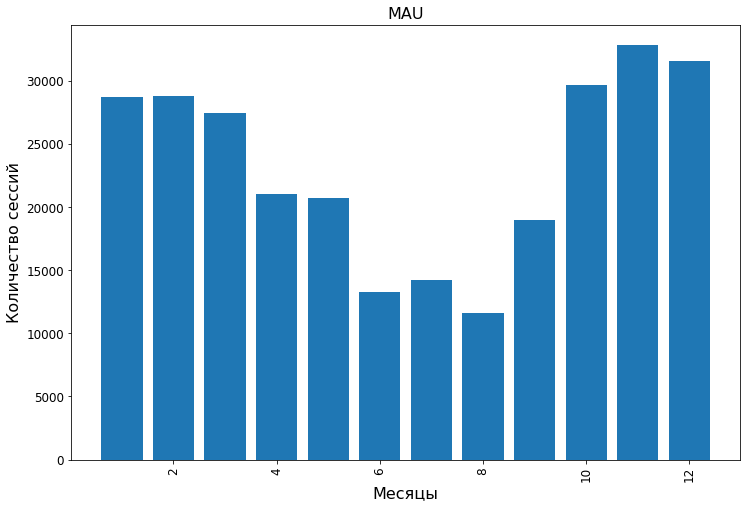

In [27]:
mau = visits_log.groupby(['session_year','session_month']).agg({'uid':'nunique'}).reset_index()
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.bar(mau['session_month'],mau['uid'])
plt.xticks(rotation=90)
plt.title('MAU', fontsize = 16)
plt.xlabel('Месяцы', fontsize = 16)
plt.ylabel('Количество сессий', fontsize = 16)
plt.show()

Из распределения количества пользователей по месяцам видно, что наибольшее количество уникальных пользователей у приложения перед новым годо с октября по декабрь, чуть меньше после нового года до марта, а вот в отпускной период начиная с апреля количество уникальных пользователей снижается до 13-14 тыс. в летние месяца, начиная с сентября снова повышается. Это можно объяснить сезонностью: летом  меньше предложение и меньше спрос в связи с отпускным сезоном. Поэтому и активность пользователей снижается.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Молодец, что обратил внимание на сезонность активности пользователей.
</div>

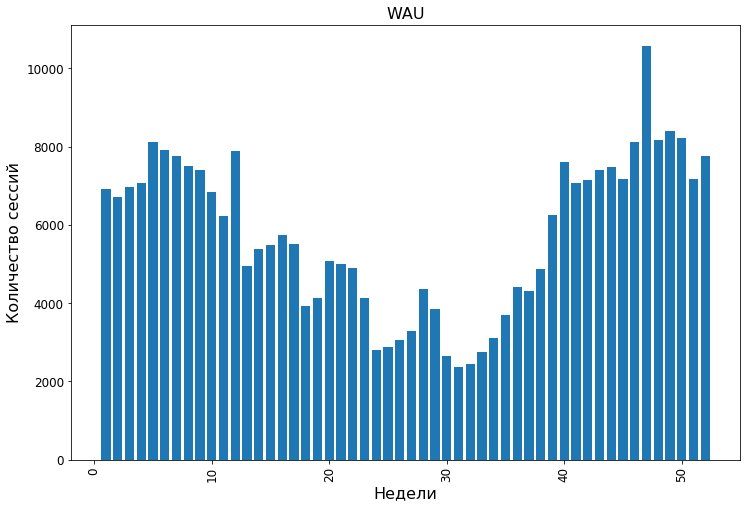

In [28]:
wau = visits_log.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.bar(wau['session_week'],wau['uid'])
plt.xticks(rotation=90)
plt.title('WAU', fontsize = 16)
plt.xlabel('Недели', fontsize = 16)
plt.ylabel('Количество сессий', fontsize = 16)
plt.show()

По неделям видна таже закономерность, только более детально: наивысший пик в ноябре, наименьшее количество новых пользователей в начале августа.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично :)
</div>

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


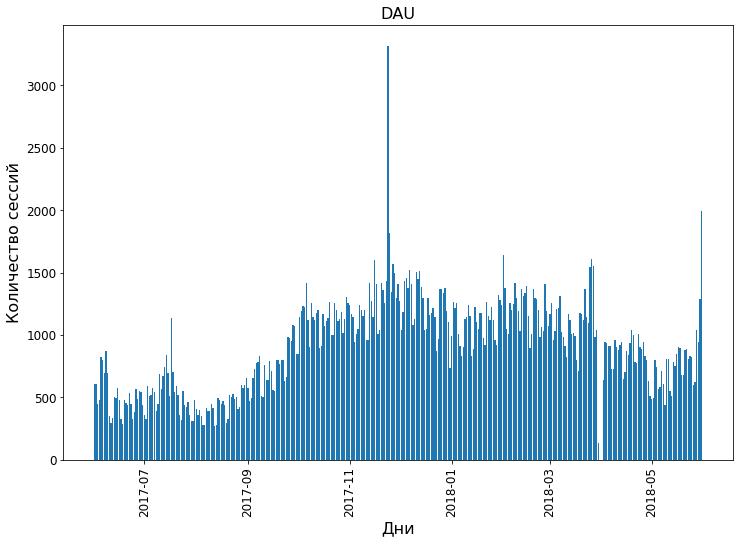

In [29]:
dau = visits_log.groupby(['session_year','session_date']).agg({'uid': 'nunique'}).reset_index()
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.bar(dau['session_date'],dau['uid'])
plt.xticks(rotation=90)
plt.title('DAU', fontsize = 16)
plt.xlabel('Дни', fontsize = 16)
plt.ylabel('Количество сессий', fontsize = 16)
plt.show()

А вот распределение по дням достаточно равномерное, есть небольшой пик 24-25 числа (дни зарплат), также 7 и 15 - дни авансов в различных организациях. 31 - дата, которая встречается в два раза реже в году, чем стальные, поэтому число уникальных пользователей ниже в два раза. Это говорит о том, что зависимости от дня практически нет, кроме 24-25, основную роль играет месяц. 

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
👍👍👍
</div>

#### Расчет среднего количества посещений сайта пользователем

Определим, сколько раз за день пользователи в среднем заходят на сайт. Построим график, отражающий изменения метрики во времени.

In [30]:
count_uniq = visits_log.groupby('session_date').agg({'uid':['count','nunique']}).reset_index()
count_uniq = count_uniq.rename(columns={'count':'uid_visits','nunique':'uid_unique'})
count_uniq['visits_mean'] = count_uniq['uid']['uid_visits']/count_uniq['uid']['uid_unique']
count_uniq.head()

session_date        uid            visits_mean
               uid_visits uid_unique            
0   2017-06-01        664        605    1.097521
1   2017-06-02        658        608    1.082237
2   2017-06-03        477        445    1.071910
3   2017-06-04        510        476    1.071429
4   2017-06-05        893        820    1.089024

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Ок :)
</div>

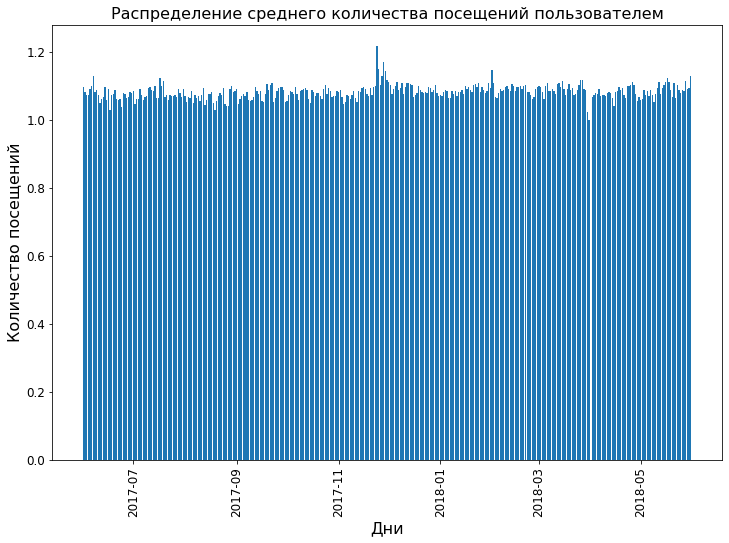

In [31]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.bar(count_uniq['session_date'],count_uniq['visits_mean'])
plt.xticks(rotation=90)
plt.title('Распределение среднего количества посещений пользователем', fontsize = 16)
plt.xlabel('Дни', fontsize = 16)
plt.ylabel('Количество посещений', fontsize = 16)
plt.show()

Из распределения видно, что среднее посещение в день одним пользователем сайта 1,1, т.е. каждый десятый заходит 2 раза. Пиковые значения в 1,2 наблюдаются перед новым годом в декабре. Посмотрим, сколько пользователи проводят времени на сайте.

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Построй, пожалуйста, годовую динамику количества сессий на 1 пользователя.
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Построил годовую динамику по дням по количеству заходов на одного пользователя.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, в среднем у нас примерно одна сессия на одного пользователя в день.
</div>

#### Среднее время на сайте

Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения.

In [32]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


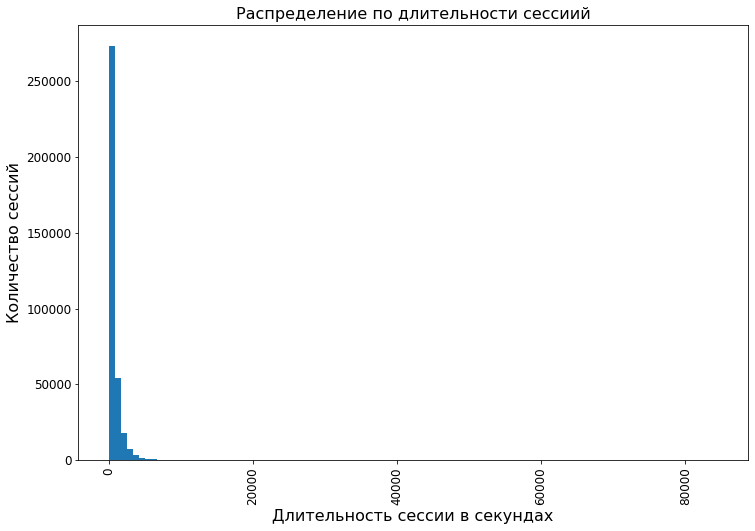

In [33]:
visits_log['session_duration_sec'] = (
    (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds)
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.hist(visits_log['session_duration_sec'], bins=100)
plt.xticks(rotation=90)
plt.title('Распределение по длительности сессиий', fontsize = 16)
plt.xlabel('Длительность сессии в секундах', fontsize = 16)
plt.ylabel('Количество сессий', fontsize = 16)
plt.show()

In [34]:
visits_log['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

Из данных выше видно, что есть нулевые сессии, которые могут указывать на ошибочный заход пользователем. Данные сессии следует исключить из расчета.

In [35]:
visits_log_query = visits_log.query('session_duration_sec > 0').copy()

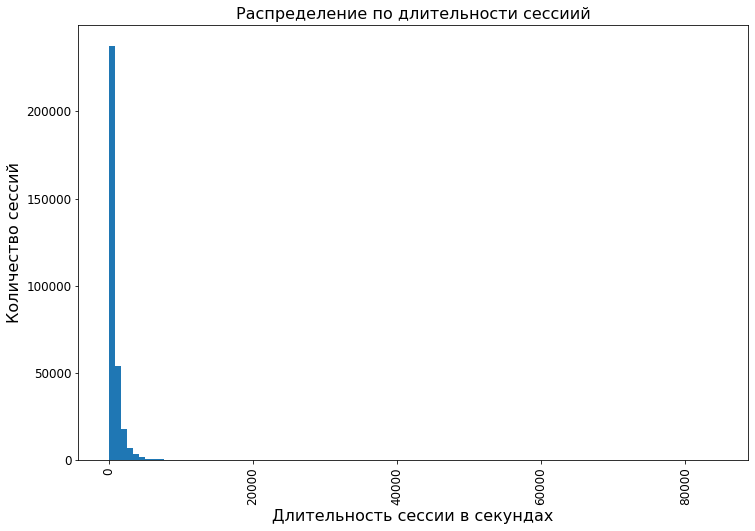

In [36]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.hist(visits_log_query['session_duration_sec'], bins=100)
plt.xticks(rotation=90)
plt.title('Распределение по длительности сессиий', fontsize = 16)
plt.xlabel('Длительность сессии в секундах', fontsize = 16)
plt.ylabel('Количество сессий', fontsize = 16)
plt.show()

In [37]:
visits_log_query['session_duration_sec'].describe()

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Не забывай, пожалуйста, про оформление графика. Нужно добавить подписи по осям и заголовок к графику.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, так график смотрится намного лучше 👍👍👍 
</div>

In [38]:
asl = visits_log['session_duration_sec'].mode()
asl

0    60
dtype: int64

Для того, чтобы при расчете не учитывать 6 тысяч нулевых сессий логичней всего использовать для расчета моду.

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Проанализируй, пожалуйста, тип графика и аргументируй выбор подходящей средней меры.
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Из-за формы распределения показательным значением является мода, а не среднее значение.
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
График оформил, аргументировал выбор подходящей средней меры.
</div>

Из графика видно, что есть нулевые сессии, т.е. ошибочные входы, а также есть сессии сверхдлинные, что скорее всего также выброс (ошибка). Среднее время препровождения пользователем на сайте (ASL) 60 секунд.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, это, скорее всего, выбросы.
</div>

#### Расчет коэффициента удержания

Рассчитаем Retention Rate, применяя когортный анализ. Покажем изменения метрики во времени на графике. Найдем средний Retention Rate на второй месяц «жизни» когорт.

Сперва извлечем дату первого захода по каждому пользователю.

In [39]:
first_session_date = visits_log.groupby(['uid'])['start_ts'].min()
first_session_date.name = 'first_session_date'
visits_log = visits_log.join(first_session_date, on='uid')
visits_log.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00


Далее ддобавим столбцы с месяцем, в котором была сессия и с месяцем первого входа на сайт по каждому пользователю. Рассчитаем время жизни в месяцах.

In [40]:
visits_log['session_month'] = visits_log['start_ts'].astype('datetime64[M]')
visits_log['first_session_month'] = visits_log['first_session_date'].astype('datetime64[M]')
visits_log['cohort_lifetime'] = (
    visits_log['session_month']
    - visits_log['first_session_month']
)
visits_log['cohort_lifetime'] = (
    visits_log['cohort_lifetime']/np.timedelta64(1, 'M')
)
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'].round().astype('int')
visits_log.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,0


Когортами становятся месяца первого входа для пользователей, исходя из этого посчитаем retention rate для каждой когорты по времени жизни.

In [41]:
cohorts = visits_log.groupby(
    ['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts

,first_session_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [42]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_session_month','uid']
]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='first_session_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(
    index='first_session_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим тепловую карту по полученным значениям.

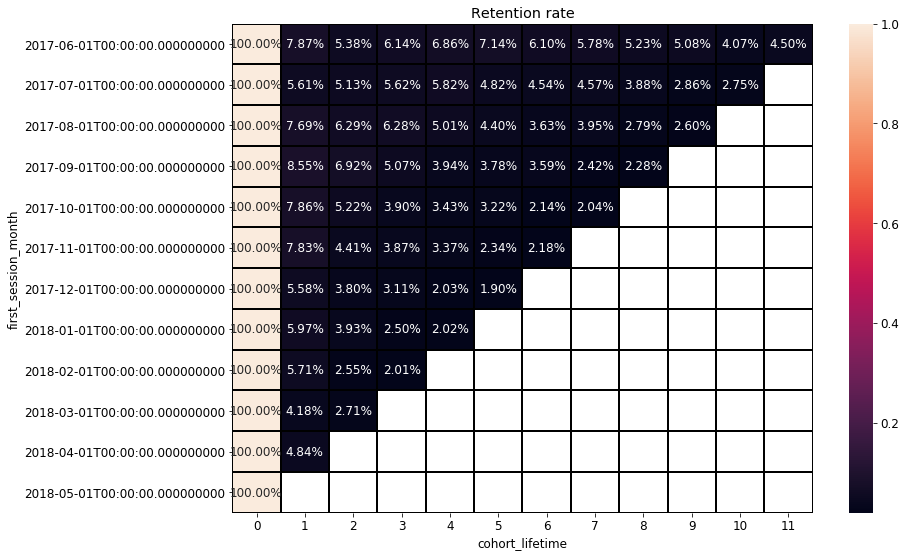

In [43]:
plt.figure(figsize=(13,9))
plt.title('Retention rate')
sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='black')

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Проверь, пожалуйста, расчёт Retention Rate (в тепловой карте не должно быть "дыр", нужно проверить округление).
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Перепроверил все расчеты, retention rate рассчитан верно, ошибка была на этапе округления времени жизни когорты. 
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Отлично, Retention Rate рассчитан верно. 
    
Подумай, пожалуйста, над удалением "00:00:00" в датах. Кроме того, советую использовать параметр vmax метода heatmap и удалить 0-й период для более информативного отображения.
</div>

Из данных видно, что диапазон удержания по всем когортам от 1,9% до 7,87%. В абсолютно всех когортах % падения RR приходится на последние 2 месяца, при этом наиболее высокий процент удержания у первых двух когорт и предпоследней. Это может говорить о том, что в этот период идет резкий спад интереса по данному контенту, также возможно появился мощный конкурент или снизилась эффективность рекламы. Требуется анализ для выяснения причин падения. Посчитаем средний RR за второй месяц жизни когорт.

In [44]:
second_month = cohorts[cohorts['cohort_lifetime'] == 2]
second_month

,first_session_month,cohort_lifetime,uid,cohort_users,retention
2,2017-06-01,2,713,13259,0.053775
14,2017-07-01,2,674,13140,0.051294
25,2017-08-01,2,640,10181,0.062862
35,2017-09-01,2,1156,16704,0.069205
44,2017-10-01,2,1357,25977,0.052239
52,2017-11-01,2,1202,27248,0.044113
59,2017-12-01,2,960,25268,0.037993
65,2018-01-01,2,890,22624,0.039339
70,2018-02-01,2,565,22197,0.025454
74,2018-03-01,2,557,20589,0.027053


In [45]:
cohort_users = second_month['uid'].sum() / second_month['cohort_users'].sum() * 100
cohort_users

4.419155420996313

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Нужно исправить расчёт Retention Rate. Кстати, среднее значение Retention Rate за второй месяц жизни когорт можно вычислить как retention_pivot[1].mean().
</div>

In [102]:
retention_pivot[1].mean()

0.06516659710392834

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Сделано)
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Средний Retention Rate за второй месяц жизни когорт равен 6,52 %.
</div>

Из данных видно, что со временем привлекается все больше пользователей на сайт, но % удержания снижается, при этом на второй месяц жизни когорт в среднем повторно заходит 4,41% пользователей.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, Ты верно отметил, что Retention Rate снижается с течением времени.
</div>

### Метрики электронной коммерции

Продуктовые метрики проанализировали, посмотрим данные в разрезе продаж.

#### Расчет среднего времени с момента входа до первой покупки

Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Для этого добавим столбец с датой первой покупки в таблицу с посещениями для каждого пользователя.

In [46]:
first_buy_date = orders_log.groupby('uid')['buy_ts'].min()
first_buy_date.name = 'first_buy_date'
visits_log = visits_log.join(first_buy_date, on='uid')
visits_log.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,cohort_lifetime,first_buy_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,0,NaT
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,0,NaT
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0,NaT
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2,2018-03-09 20:25:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,0,NaT


Из таблицы видно, что не все пользователи совершали покупки, удалим их из таблицы.

In [47]:
visits_log = visits_log.dropna()
visits_log.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,cohort_lifetime,first_buy_date
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2,2018-03-09 20:25:00
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0,2017-09-04 12:46:00
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018,2018-02-01,6,2018-02-06,300,2017-06-04 14:17:00,2017-06-01,8,2017-06-25 08:54:00
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018,2018-02-01,7,2018-02-12,3960,2018-02-10 12:17:00,2018-02-01,0,2018-02-12 19:48:00
25,desktop,2017-12-05 10:28:00,4,2017-12-05 10:21:00,2307401184189569202,2017,2017-12-01,49,2017-12-05,420,2017-09-23 23:27:00,2017-09-01,3,2017-09-27 09:23:00


Некоторые пользователи после первого входа несколько дней принимают решение, некоторые сразу. Вычтем из столбца с датой первой покупки столбец с датой первого входа.

In [48]:
visits_log['time_for_first_buy'] = (visits_log['first_buy_date'] - visits_log['first_session_date']).dt.seconds
visits_log.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,cohort_lifetime,first_buy_date,time_for_first_buy
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2,2018-03-09 20:25:00,1200
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0,2017-09-04 12:46:00,54660
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018,2018-02-01,6,2018-02-06,300,2017-06-04 14:17:00,2017-06-01,8,2017-06-25 08:54:00,67020
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018,2018-02-01,7,2018-02-12,3960,2018-02-10 12:17:00,2018-02-01,0,2018-02-12 19:48:00,27060
25,desktop,2017-12-05 10:28:00,4,2017-12-05 10:21:00,2307401184189569202,2017,2017-12-01,49,2017-12-05,420,2017-09-23 23:27:00,2017-09-01,3,2017-09-27 09:23:00,35760


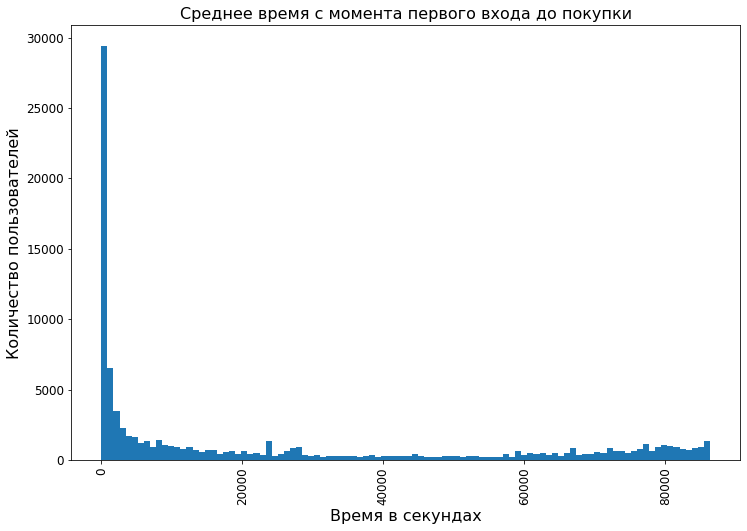

In [49]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.hist(visits_log['time_for_first_buy'], bins=100)
plt.xticks(rotation=90)
plt.title('Среднее время с момента первого входа до покупки', fontsize = 16)
plt.xlabel('Время в секундах', fontsize = 16)
plt.ylabel('Количество пользователей', fontsize = 16)
plt.show()

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Проанализируй, пожалуйста, тип распределения и выбери подходящую среднюю меру.
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Ниже представлен анализ и расчет, а также дополненные выводы.
</div>

In [50]:
visits_log['time_for_first_buy'].describe()

count    97394.000000
mean     24750.075159
std      30076.730636
min          0.000000
25%        540.000000
50%       7920.000000
75%      50340.000000
max      86340.000000
Name: time_for_first_buy, dtype: float64

In [51]:
visits_log[visits_log['time_for_first_buy'] == 0]['time_for_first_buy'].count()

5367

In [52]:
visits_log[visits_log['time_for_first_buy'] == 0].head(15)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,cohort_lifetime,first_buy_date,time_for_first_buy
125,desktop,2018-02-12 17:23:00,3,2018-02-12 17:23:00,14190261731932459700,2018,2018-02-01,7,2018-02-12,0,2018-02-12 17:23:00,2018-02-01,0,2018-02-12 17:23:00,0
568,touch,2017-07-07 22:27:00,4,2017-07-07 22:23:00,16893204926331313613,2017,2017-07-01,27,2017-07-07,240,2017-07-07 20:24:00,2017-07-01,0,2017-07-07 20:24:00,0
573,desktop,2017-12-14 10:29:00,2,2017-12-14 10:29:00,5643980081168402078,2017,2017-12-01,50,2017-12-14,0,2017-11-27 20:19:00,2017-11-01,1,2017-11-27 20:19:00,0
602,desktop,2017-10-24 13:31:00,3,2017-10-24 13:29:00,3880307572277982999,2017,2017-10-01,43,2017-10-24,120,2017-10-24 12:48:00,2017-10-01,0,2017-10-24 12:48:00,0
647,desktop,2017-12-20 22:36:00,5,2017-12-20 22:19:00,8227366664006369899,2017,2017-12-01,51,2017-12-20,1020,2017-12-20 20:59:00,2017-12-01,0,2017-12-20 20:59:00,0
693,desktop,2017-12-26 15:02:00,1,2017-12-26 15:01:00,1215649885211388437,2017,2017-12-01,52,2017-12-26,60,2017-12-26 13:21:00,2017-12-01,0,2017-12-26 13:21:00,0
762,touch,2017-10-19 18:10:00,3,2017-10-19 18:10:00,4578093875793886513,2017,2017-10-01,42,2017-10-19,0,2017-07-18 19:04:00,2017-07-01,3,2017-07-18 19:04:00,0
784,desktop,2017-09-26 18:29:00,3,2017-09-26 18:28:00,14707981678571651516,2017,2017-09-01,39,2017-09-26,60,2017-09-26 10:32:00,2017-09-01,0,2017-09-26 10:32:00,0
855,desktop,2017-12-22 19:39:00,3,2017-12-22 19:38:00,5837022487536856594,2017,2017-12-01,51,2017-12-22,60,2017-12-22 19:38:00,2017-12-01,0,2017-12-22 19:38:00,0
908,desktop,2018-04-04 20:21:00,4,2018-04-04 20:21:00,13473864099089676394,2018,2018-04-01,14,2018-04-04,0,2018-04-04 20:21:00,2018-04-01,0,2018-04-04 20:21:00,0


Из данных выше видно, что на 5367 покупок отвелось 0 секунд, это может означать, что данная покупка совершена при прерыве предыдущейй сессии. Скорее всего покупатель уже заходил и сформировал корзину в период, который выходит за пределы рассматреваемого времени. Значит данные покупки не стоит брать в расчет, это исказит результаты, поэтому стоит взять моду.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, верно :)
</div>

In [53]:
asl_buy = visits_log[visits_log['time_for_first_buy'] != 0]['time_for_first_buy'].mode()
asl_buy

0    60
dtype: int64

Из графика видно, что большинство пользователей совершает первую покупку в пределах двух часов, однако есть часть пользователей (около 10000 пользователей, что составляет ~ 10% от всех пользователей), которым требуется 20 дней на приянтие решения. В основном на совершение покупки у пользователя уходит 60 секунд.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Ты абсолютно верно отметил, что большинство пользователей совершают покупки в первый день.
</div>

#### Расчет среднего количества покупок на одного покупателя за 6 месяцев

Применяя когортный анализ, рассчитаем среднее количество покупок на одного покупателя за 6 месяцев.

In [54]:
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Добавим дату первой покупки в таблицу с заказами, которую ранее уже использовали в таблице с визитами.

In [55]:
orders_log = orders_log.join(first_buy_date, on='uid')
orders_log.head()

,buy_ts,revenue,uid,first_buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


Добавим столбцы с месяцем покупки и месяцем первой покупки, вычислим время жизни и отфильруем первые 6 месяцев.

In [56]:
orders_log['buy_month'] = orders_log['buy_ts'].astype('datetime64[M]')
orders_log['first_buy_month'] = orders_log['first_buy_date'].astype('datetime64[M]')
orders_log['cohort_lifetime'] = orders_log['buy_month'] - orders_log['first_buy_month']
orders_log['cohort_lifetime'] = (
    orders_log['cohort_lifetime']/np.timedelta64(1, 'M')
)
orders_log['cohort_lifetime'] = orders_log['cohort_lifetime'].round().astype('int')
orders_log_6_month = orders_log[orders_log['cohort_lifetime'] < 6]
orders_log_6_month.head()

,buy_ts,revenue,uid,first_buy_date,buy_month,first_buy_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


Посчитаем среднее количество покупок по когортам.

In [57]:
cohorts = orders_log_6_month.groupby(
    ['first_buy_month','cohort_lifetime']).agg({'buy_ts':'nunique','uid':'nunique'})
cohorts['mean_buy']  = cohorts['buy_ts'] / cohorts['uid']
cohorts.reset_index(inplace=True)
cohorts.head()

,first_buy_month,cohort_lifetime,buy_ts,uid,mean_buy
0,2017-06-01,0,2245,2023,1.109738
1,2017-06-01,1,176,61,2.885246
2,2017-06-01,2,174,50,3.480000
3,2017-06-01,3,223,54,4.129630
4,2017-06-01,4,292,88,3.318182


Выведем таблицу и посчитаем среднее количество покупок на пользователя за 6 месяцев.

In [58]:
orders_stat = cohorts.pivot_table(
    index = 'first_buy_month',
    columns = 'cohort_lifetime',
    values = 'mean_buy',
    aggfunc = 'mean'
)
orders_stat

cohort_lifetime,0,1,2,3,4,5
first_buy_month,,,,,,
2017-06-01,1.109738,2.885246,3.480000,4.129630,3.318182,3.238806
2017-07-01,1.079563,1.923077,2.105263,1.609375,1.469388,2.157895
2017-08-01,1.081022,1.844828,1.886792,1.818182,2.100000,1.937500
2017-09-01,1.079427,1.684615,1.600000,2.216216,1.288462,1.703125
2017-10-01,1.044470,1.519417,1.317073,1.326087,1.387097,1.430556
2017-11-01,1.049743,1.756757,1.500000,1.981132,1.679012,1.229167
2017-12-01,1.059092,1.842466,1.961165,1.845361,1.720000,1.666667
2018-01-01,1.051290,1.947368,1.915663,1.488372,1.733333,NaN
2018-02-01,1.032320,1.872881,1.431034,1.794872,NaN,NaN


In [59]:
mean_buy = cohorts['buy_ts'].sum()/cohorts['uid'].sum()
mean_buy

1.1293122801766071

Итак, в среднем пользователь совершает 1,13 покупки, при этом в разрезе когорт видно, что первая когорта намного больше совершает заказов, относительно последующих, больше 3-х. По разрезам жизни когорт есть ощущение, что количество в среднем больше, чем расчетное, но если обратить внимание на веса, то: в нулевой месяц жизни когорты совершается наибольшее количество покупок, по всем когортам эта цифра не превышает 1,1 кроме первой. В последующем пользоваетли покупают больше, но если учесть % удержания, то становитс ясно, что таких покупок гораздо меньше, чем в первый раз. Также снижение количество покупок в последующих когортах после первой может говорить о том, что возможно изменилось что-то в части программного обеспечения и новые пользователи хуже понимают интерфейс, первые же пользователи успешно продолжают пользоваться, возможно изменилось обучение использованию или навигация.

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Проверь, пожалуйста, расчёты (должно получиться меньше чем 1.5).
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Провел повторный расчет, проверил округления и плюс поменял формулу расчета среднего.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Таким образом, можно сделать вывод, что повторные покупки есть, но они редки.
</div>

#### Расчет среднего чека по времени

Рассчитаем средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Построим график, отражающий изменения метрики во времени.

In [60]:
orders_log['buy_hour'] = orders_log['buy_ts'].dt.hour
revenue_mean_hour = orders_log.groupby('buy_hour')['revenue'].mean().reset_index()
revenue_mean_hour.head()

,buy_hour,revenue
0,0,4.532290
1,1,4.501943
2,2,4.680328
3,3,4.202533
4,4,3.629189


Если смотреть средний чек в разрезе каждого часа, то видно, что наибольшие средние чеки в 8 утра и 21 вечера. 

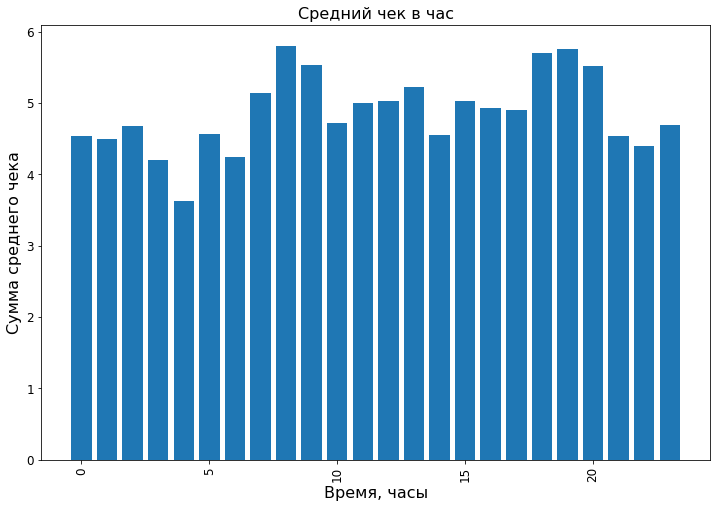

In [61]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.bar(revenue_mean_hour['buy_hour'], revenue_mean_hour['revenue'])
plt.xticks(rotation=90)
plt.title('Средний чек в час', fontsize = 16)
plt.xlabel('Время, часы', fontsize = 16)
plt.ylabel('Сумма среднего чека', fontsize = 16)
plt.show()

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Необходимо проанализировать в какие периоды средний чек минимален и максимален.
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Ниже расчет и дополненные выводы.
</div>

In [62]:
revenue_mean_max = revenue_mean_hour[
    revenue_mean_hour['revenue'] == max(revenue_mean_hour['revenue'])]
revenue_mean_max

,buy_hour,revenue
8,8,5.8075


In [63]:
revenue_mean_min = revenue_mean_hour[
    revenue_mean_hour['revenue'] == min(revenue_mean_hour['revenue'])]
revenue_mean_min

,buy_hour,revenue
4,4,3.629189


In [64]:
revenue_mean = orders_log['revenue'].sum() / orders_log['buy_ts'].nunique()
revenue_mean

5.480576634558935

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Ещё средний чек можно вычислить как orders['revenue'].mean().
</div>

При этом средний чек в целом составляет 5.48 у.е., если обратиться к графику выше, то становиться понятно, что те часы, в которые наивысший средний чек, в эти часы наибольшее количество продаж. Наибольший средний чек 5,81 в 8 утра, наименьший 3,63 в 4 утра, но учитывая средний чек, можно сказать, что в 4 утра совершается крайне мало покупок, поэтому на среднее это не влияет, а максимальная цифра близка к средней, что говорит о относительной равномерности продаж в пиковые часы, когда пользователей много. Т.к. из графика визуально кажется, что средний чек должен быть ниже. Проверим догадку.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Молодец, что детально проанализировал динамику среднего чека.
</div>

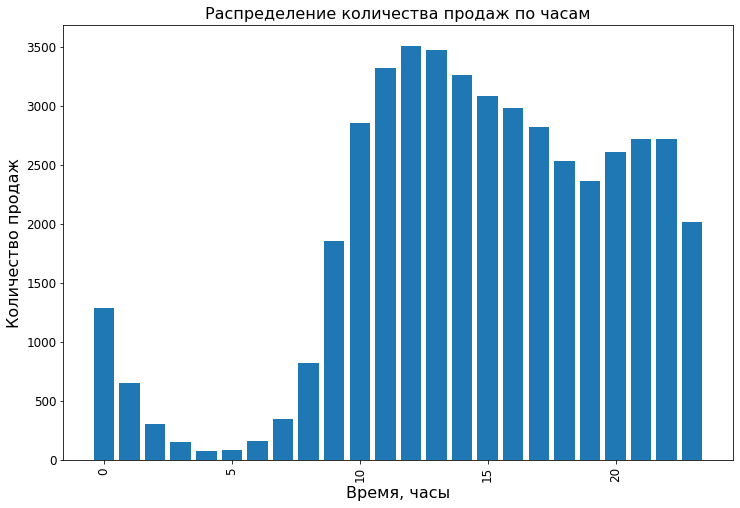

In [65]:
count_buy_hour = orders_log.groupby('buy_hour')['buy_ts'].nunique().reset_index()
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.bar(count_buy_hour['buy_hour'], count_buy_hour['buy_ts'])
plt.xticks(rotation=90)
plt.title('Распределение количества продаж по часам', fontsize = 16)
plt.xlabel('Время, часы', fontsize = 16)
plt.ylabel('Количество продаж', fontsize = 16)
plt.show()

Из распределения видно, что в те часы, когда средний чек выше 5 у.е. являются наиболее активными среди покупателей, поэтому средний чек и составляет 5.48 у.е.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Молодец, что выявил эту закономерность.
</div>

#### Расчет LTV

Выясним, как меняется LTV на покупателя по когортам. Рассчитаем средний LTV по когортам за 6 месяцев; в расчёт включим когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразим изменения метрики во времени на графике.

Сперва посчитаем по когортам количество купивших в первый месяц, это будет размер когорты.

In [66]:
cohort_sizes = (
    orders_log.groupby('first_buy_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_buy_month', 'n_buyers']
cohort_sizes.head()

,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Посчитаем сумму покупок по когортам по месяцам.

In [67]:
cohorts = (
    orders_log.groupby(['first_buy_month', 'buy_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on='first_buy_month')
report

,first_buy_month,n_buyers,buy_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


Вычислим время жизни по месяцам и ltv на покупателя (сумма выручки).

In [68]:
report['age'] = (
    report['buy_month'] - report['first_buy_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['revenue'] / report['n_buyers']
report

,first_buy_month,n_buyers,buy_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


Отсечем когорты с временем жизни меньше 6 месяцев.

In [69]:
age_6m = report[report['age'] == 5]
cohorts_6m = list(age_6m['first_buy_month'].unique())
cohorts_6m = pd.Series(cohorts_6m)
cohorts_6m.name = 'first_buy_month'
report_6m = report.merge(cohorts_6m, how='inner', on='first_buy_month')
report_6m

,first_buy_month,n_buyers,buy_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
58,2017-12-01,4383,2018-01-01,1141.22,1,0.260374
59,2017-12-01,4383,2018-02-01,4054.70,2,0.925097
60,2017-12-01,4383,2018-03-01,4669.10,3,1.065275
61,2017-12-01,4383,2018-04-01,1371.57,4,0.312930


Посмотрим как распределилась ltv по когортам и вычислим среднее ltv за 6 месяцев.

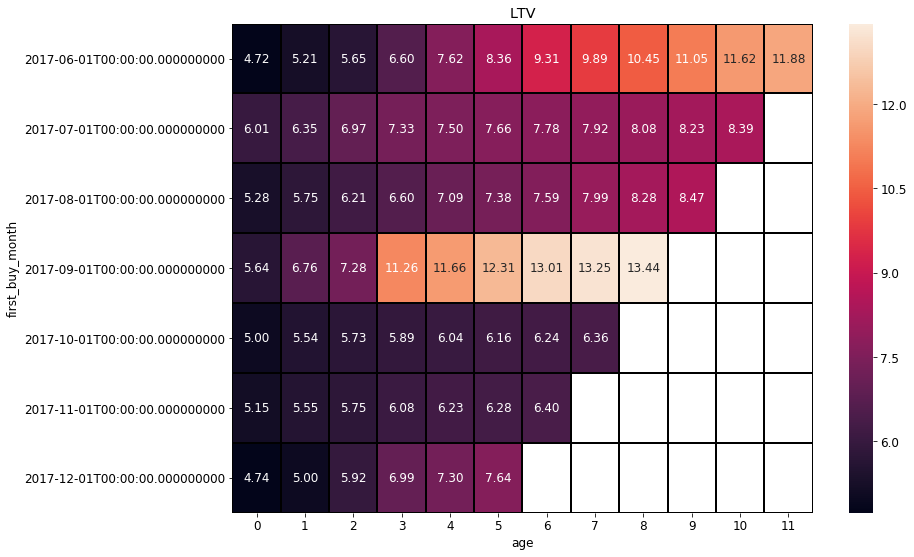

In [70]:
result = report_6m.pivot_table(
    index='first_buy_month', columns='age', values='ltv', aggfunc='mean'
)
result = result.cumsum(axis=1)
plt.figure(figsize=(13,9))
plt.title('LTV')
sns.heatmap(result, annot=True, fmt='.2f', linewidths=1, linecolor='black')

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Необходимо учесть, что LTV накопительная характеристика.
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Скорректировал.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
👍👍👍 
</div>

In [71]:
m6_cum_ltv = result[5].mean()
print('Средний LTV за 6 месяцев после первой покупки:', m6_cum_ltv)

Средний LTV за 6 месяцев после первой покупки: 7.969052630207335


<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:

Значение получилось верное, но накопительность метрики нужно учитывать в сводной таблице.
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Учел.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, средний LTV вычислен верно.
</div>

Из данных выше видим, что в когортах, которые прожили 6 месяцев и более: на шестой месяц кумулятивная ltv в среднем составляет 7.97 у.е., т.е. в течение 6 месяцев пользователь в среднем приносит такую сумму сайту. Заметно, что первая, четвертая и седьмая когорты более интенсивно прирастают, нежели остальные. Это возможно связано с сезонностью или маркетинговой активностью, шаг в три месяца. Также в когорте 4 на 4 месяце (в декабре) видна высокая средняя выручка на человека, это может быть связано с маркетинговым предложением перед новым годом для данной когорты, что создало эффективный прирост продаж, следует проанализировать данный период и действия для повышения продаж в остальных когортах.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, когорты детально проанализированы.
</div>

### Маркетинговые метрики

Посчитаем и отобразим на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.

#### Расчет суммы расходов на маркетинг

Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.

In [72]:
total_costs = costs['costs'].sum()
total_costs

329131.62

Общие расходы за весь период на маркетинг потрачено 329131 у.е., посмотрим как расходы на маркетинг распределялись вовремени.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, суммарные расходы вычислены верно. Молодец, что не забыл указать валюту.
</div>

In [73]:
total_costs_day = costs.groupby('dt')['costs'].sum().reset_index()

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Вывод warnings можно убрать используя код ниже.
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Спасибо за полезный совет!
</div>

In [74]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

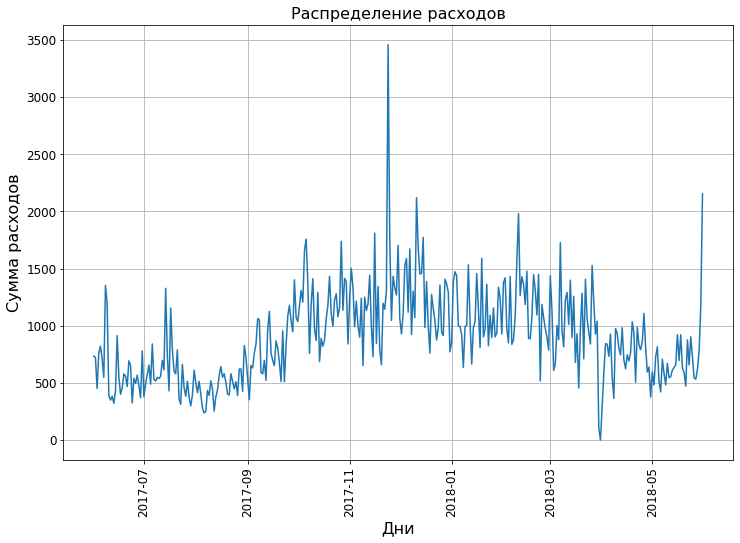

In [75]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.plot(total_costs_day['dt'], total_costs_day['costs'])
plt.grid()
plt.xticks(rotation=90)
plt.title('Распределение расходов', fontsize = 16)
plt.xlabel('Дни', fontsize = 16)
plt.ylabel('Сумма расходов', fontsize = 16)
plt.show()

Из распределения видно, что наибольшие расходы приходятся на декабрьские даты. В этот период расходы достигают 3500 у.е., в остальные дни только 3 раза расходы достигают 2000 у.е. Расходы меняются исходя из дня недели, скорее всего это связано с выходными и праздничными днями.

In [76]:
source_id = visits_log[['source_id','device']]
source_id = source_id.groupby('source_id')['device'].unique().reset_index()
source_id

,source_id,device
0,1,"[desktop, touch] Categories (2, object): [desk..."
1,2,"[touch, desktop] Categories (2, object): [touc..."
2,3,"[desktop, touch] Categories (2, object): [desk..."
3,4,"[desktop, touch] Categories (2, object): [desk..."
4,5,"[desktop, touch] Categories (2, object): [desk..."
5,7,"[desktop] Categories (1, object): [desktop]"
6,9,"[desktop, touch] Categories (2, object): [desk..."
7,10,"[desktop, touch] Categories (2, object): [desk..."


Исходя из данных выше, видно, что всего 8 ресурсов, с которых заходят пользователи. При этом источник №7  - это входы только с компьютера, нет посещений с телефона, возможно нет адаптации с телефона для данного ресурса.

In [77]:
source_7_count = visits_log[visits_log['source_id'] == 7]['source_id'].count()
source_7_count

1

Скорее всего на данный ресурс не тратится средств по привлечению, поэтому его можно исключить из списка для расчета. Проверим.

In [78]:
costs_id_7 = costs[costs['source_id'] == 7]
costs_id_7

,source_id,dt,costs


Да, действительно, данный источник не является целевым, в него не вкладываются маркетинговые расходы. Уберем его из списка.

In [79]:
source_id = source_id[source_id['source_id'] != 7]
source_id

,source_id,device
0,1,"[desktop, touch] Categories (2, object): [desk..."
1,2,"[touch, desktop] Categories (2, object): [touc..."
2,3,"[desktop, touch] Categories (2, object): [desk..."
3,4,"[desktop, touch] Categories (2, object): [desk..."
4,5,"[desktop, touch] Categories (2, object): [desk..."
6,9,"[desktop, touch] Categories (2, object): [desk..."
7,10,"[desktop, touch] Categories (2, object): [desk..."


Посмотрим сколько тратится на каждый ресурс в отдельности, для удобства посмотрим по неделям.

In [80]:
costs['dt_month'] = costs['dt'].astype('datetime64[M]')

In [81]:
source_id_grouped = costs.groupby(['source_id','dt_month'])['costs'].sum().reset_index()
source_id_grouped

,source_id,dt_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


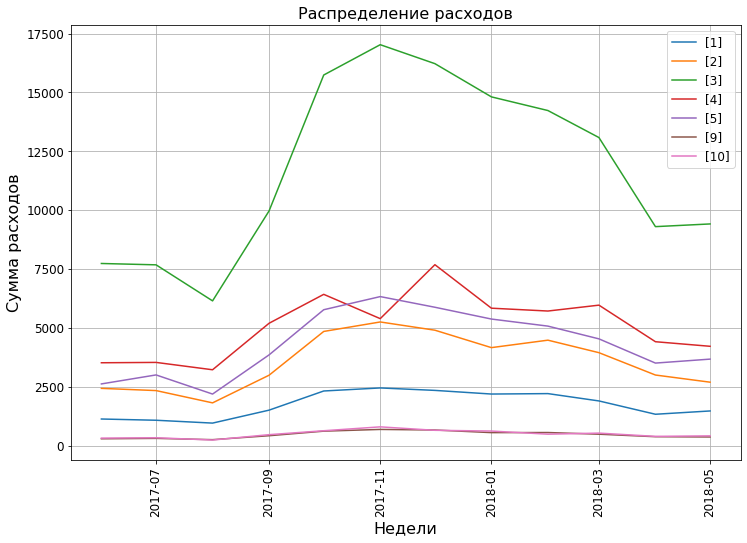

In [82]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.grid()
plt.xticks(rotation=90)
plt.title('Распределение расходов', fontsize = 16)
plt.xlabel('Недели', fontsize = 16)
plt.ylabel('Сумма расходов', fontsize = 16)

for i in source_id['source_id']:
    slice_source = source_id_grouped[source_id_grouped['source_id'] == i]
    plt.plot(slice_source['dt_month'],slice_source['costs'], label = slice_source['source_id'].unique())
plt.legend()
plt.show()

Исходя из графика видно, что наибольшие траты приходятся на 3 источник трафика, далее идут 4, 5 и 2 ой. А вот вложения в 9-й и 10-й источник минимальны.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, верно 3-й источник самый затратный.
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Из-за того, что Ты показываешь расходы по неделям графики сильно "колеблются", советую в данном случае построить графики расходов по месяцам
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Последовал совету.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Ок :)
</div>

#### Рассчет CAC

Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразим изменения метрик на графиках.

In [83]:
orders_log.head()

,buy_ts,revenue,uid,first_buy_date,buy_month,first_buy_month,cohort_lifetime,buy_hour
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,7


В файле по заказам нет информации по ресурсам, с которых были привлечены пользователи, но есть уникальные номера покупателей. Можно по файлу о визитах вычислить ресурс, через который пользователь был привлечен впервые на сайт и присоединить к заказам. А в расходах уже есть id ресурса.

In [84]:
costs.head()

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


Сперва посчитаем общий САС, без разбития по источникам привлечения. Для этого посчитаем расходы по месяцам.

In [85]:
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby('month')['costs'].sum()
monthly_costs

month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

Далее воспользуемся таблицей report, которую ранее создали при расчете LTV.

In [86]:
report

,first_buy_month,n_buyers,buy_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


Соединим полученные данные для расчета САС. 

In [87]:
report_new = pd.merge(
    report, monthly_costs, left_on='first_buy_month', right_on='month'
)
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_cac = report_new.groupby('first_buy_month')['cac'].mean().reset_index()
report_cac

,first_buy_month,cac
0,2017-06-01,8.905091
1,2017-07-01,9.485486
2,2017-08-01,10.796015
3,2017-09-01,9.441654
4,2017-10-01,8.369327
5,2017-11-01,9.288870
6,2017-12-01,8.741809
7,2018-01-01,9.937302
8,2018-02-01,8.962758
9,2018-03-01,8.608907


In [88]:
CAC = report_new['costs'].sum() / report_new['n_buyers'].sum()
CAC

9.146498729412189

Средний CAC для всего проекта составляет 9,15 у.е.

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Рассчитай, пожалуйста, средний САС для всего проекта.
</div>

### <font color='green'>Комментарий студента</font> <a class="tocSkip">
<div class="alert alert-block alert-success">
Посчитал.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, средний САС вычислен верно.
</div>

Построим график распределения для наглядности.

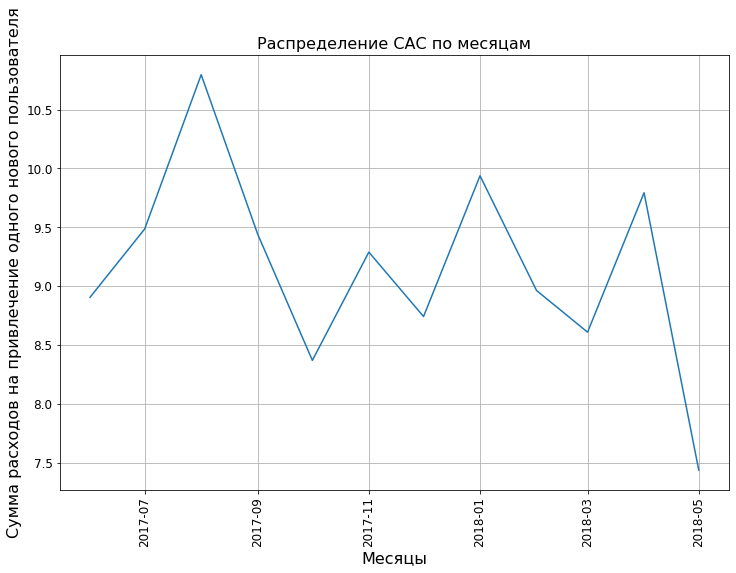

In [89]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.plot(report_cac['first_buy_month'], report_cac['cac'])
plt.grid()
plt.xticks(rotation=90)
plt.title('Распределение CAC по месяцам', fontsize = 16)
plt.xlabel('Месяцы', fontsize = 16)
plt.ylabel('Сумма расходов на привлечение одного нового пользователя', fontsize = 16)
plt.show()

Из графика видно, что наибольшие расходы на привлечение одного пользователя пришлись на август 2017, далее январь и апрель. Посмотрим в разрезе источников привлечения: как распределяется САС.

In [90]:
monthly_costs_source = costs.groupby(['source_id','month'])['costs'].sum().reset_index()
monthly_costs_source

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


Посчитали расходы по месяцам для каждого источника трафика, теперь выясним с какого источника пришел в первый раз каждый пользователь.

In [91]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,cohort_lifetime,first_buy_date,time_for_first_buy
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2,2018-03-09 20:25:00,1200
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0,2017-09-04 12:46:00,54660
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018,2018-02-01,6,2018-02-06,300,2017-06-04 14:17:00,2017-06-01,8,2017-06-25 08:54:00,67020
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018,2018-02-01,7,2018-02-12,3960,2018-02-10 12:17:00,2018-02-01,0,2018-02-12 19:48:00,27060
25,desktop,2017-12-05 10:28:00,4,2017-12-05 10:21:00,2307401184189569202,2017,2017-12-01,49,2017-12-05,420,2017-09-23 23:27:00,2017-09-01,3,2017-09-27 09:23:00,35760


In [92]:
first_source_visit = visits_log[visits_log['start_ts'] == visits_log['first_session_date']]
first_source_visit_filtered = first_source_visit.groupby('uid')['source_id'].mean().reset_index()
first_source_visit_filtered.head()

,uid,source_id
0,313578113262317,2
1,1575281904278712,10
2,2429014661409475,3
3,2464366381792757,5
4,2551852515556206,5


Объединим полученные данные с заказами, теперь видно, какой источник (по которому первый раз зашел пользователь) соответствует определенному заказу.

In [93]:
orders_log = orders_log.merge(first_source_visit_filtered, on='uid')
orders_log.head()

,buy_ts,revenue,uid,first_buy_date,buy_month,first_buy_month,cohort_lifetime,buy_hour,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,7,3


Определим размеры когорт для каждого источника по первому месяцу покупки.

In [94]:
cohort_sizes = (
    orders_log.groupby(['source_id','first_buy_month'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['source_id','first_buy_month', 'n_buyers']
cohort_sizes.head()

,source_id,first_buy_month,n_buyers
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340


Посчитаем сумму заказов для каждого месяца по источникам ресурсов.

In [95]:
cohorts = (
    orders_log.groupby(['source_id','first_buy_month', 'buy_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on=['source_id','first_buy_month'])
report

,source_id,first_buy_month,n_buyers,buy_month,revenue
0,1,2017-06-01,190,2017-06-01,1378.70
1,1,2017-06-01,190,2017-07-01,414.98
2,1,2017-06-01,190,2017-08-01,419.43
3,1,2017-06-01,190,2017-09-01,714.24
4,1,2017-06-01,190,2017-10-01,811.20
...,...,...,...,...,...
511,10,2018-03-01,186,2018-03-01,638.44
512,10,2018-03-01,186,2018-04-01,12.71
513,10,2018-03-01,186,2018-05-01,6.29
514,10,2018-04-01,107,2018-04-01,261.93


Посчитаем возраст когорт и LTV по каждому источнику ресурса.

In [96]:
report['age'] = (
    report['buy_month'] - report['first_buy_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['revenue'] / report['n_buyers']
report

,source_id,first_buy_month,n_buyers,buy_month,revenue,age,ltv
0,1,2017-06-01,190,2017-06-01,1378.70,0,7.256316
1,1,2017-06-01,190,2017-07-01,414.98,1,2.184105
2,1,2017-06-01,190,2017-08-01,419.43,2,2.207526
3,1,2017-06-01,190,2017-09-01,714.24,3,3.759158
4,1,2017-06-01,190,2017-10-01,811.20,4,4.269474
...,...,...,...,...,...,...,...
511,10,2018-03-01,186,2018-03-01,638.44,0,3.432473
512,10,2018-03-01,186,2018-04-01,12.71,1,0.068333
513,10,2018-03-01,186,2018-05-01,6.29,2,0.033817
514,10,2018-04-01,107,2018-04-01,261.93,0,2.447944


Соединим данные по расходам и данные по доходам. Рассчитаем САС.

In [97]:
report_new_source = pd.merge(
    report, monthly_costs_source, left_on=['source_id','first_buy_month'], right_on=['source_id','month']
)
report_new_source['cac'] = report_new_source['costs'] / report_new_source['n_buyers']
report_new_source.head()

,source_id,first_buy_month,n_buyers,buy_month,revenue,age,ltv,month,costs,cac
0,1,2017-06-01,190,2017-06-01,1378.70,0,7.256316,2017-06-01,1125.61,5.924263
1,1,2017-06-01,190,2017-07-01,414.98,1,2.184105,2017-06-01,1125.61,5.924263
2,1,2017-06-01,190,2017-08-01,419.43,2,2.207526,2017-06-01,1125.61,5.924263
3,1,2017-06-01,190,2017-09-01,714.24,3,3.759158,2017-06-01,1125.61,5.924263
4,1,2017-06-01,190,2017-10-01,811.20,4,4.269474,2017-06-01,1125.61,5.924263


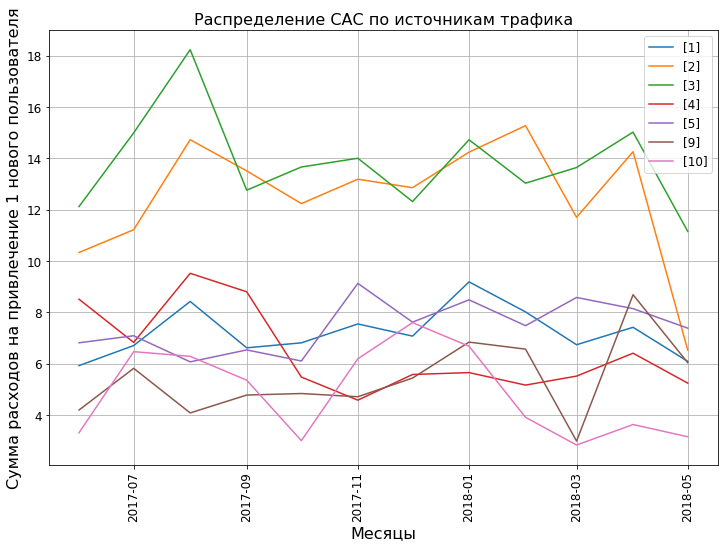

In [98]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '12'
plt.grid()
plt.xticks(rotation=90)
plt.title('Распределение CAC по источникам трафика', fontsize = 16)
plt.xlabel('Месяцы', fontsize = 16)
plt.ylabel('Сумма расходов на привлечение 1 нового пользователя', fontsize = 16)

for i in source_id['source_id']:
    slice_source = report_new_source[report_new_source['source_id']==i]
    slice_cac = slice_source.groupby('first_buy_month')['cac'].mean().reset_index()
    plt.plot(slice_cac['first_buy_month'], slice_cac['cac'], label = slice_source['source_id'].unique())
plt.legend()
plt.show()

Из данных видно, что больше всего расходов на привлечение 1 пользователя на ресурсе 3, при этом на ресурсе 2 в феврале расходы были максимальны. Остальные источники трафика по расходам на 1 пользоваеля колеблются в пределах 10 у.е.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличный анализ :)
</div>

#### Расчет ROMI по источникам трафика

Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. Построим графики, отражающие изменения метрик во времени.

In [99]:
report_new_source['romi'] = report_new_source['ltv'] / report_new_source['cac']
report_new_source.head()

,source_id,first_buy_month,n_buyers,buy_month,revenue,age,ltv,month,costs,cac,romi
0,1,2017-06-01,190,2017-06-01,1378.70,0,7.256316,2017-06-01,1125.61,5.924263,1.224847
1,1,2017-06-01,190,2017-07-01,414.98,1,2.184105,2017-06-01,1125.61,5.924263,0.368671
2,1,2017-06-01,190,2017-08-01,419.43,2,2.207526,2017-06-01,1125.61,5.924263,0.372625
3,1,2017-06-01,190,2017-09-01,714.24,3,3.759158,2017-06-01,1125.61,5.924263,0.634536
4,1,2017-06-01,190,2017-10-01,811.20,4,4.269474,2017-06-01,1125.61,5.924263,0.720676


Посмотрим, как быстро окупаются расходы на маркетинг по когортам для каждого ресурса в отдельности.

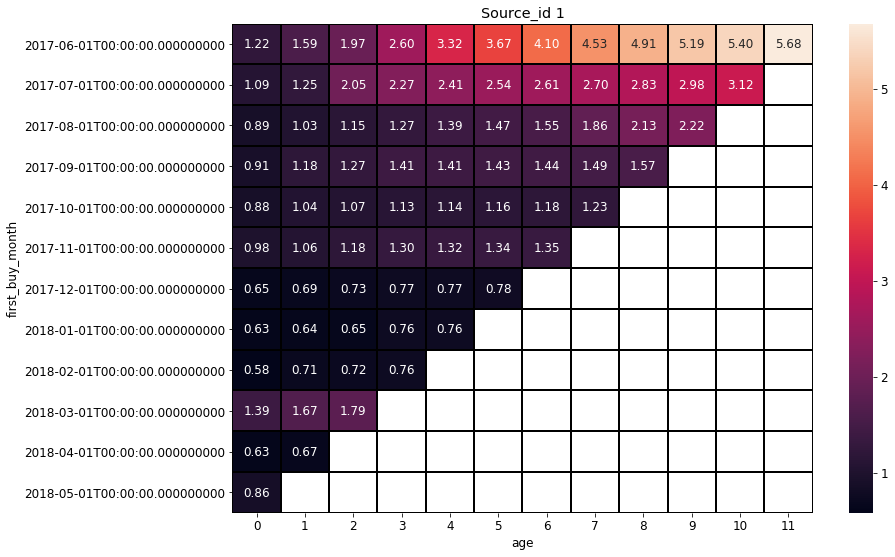

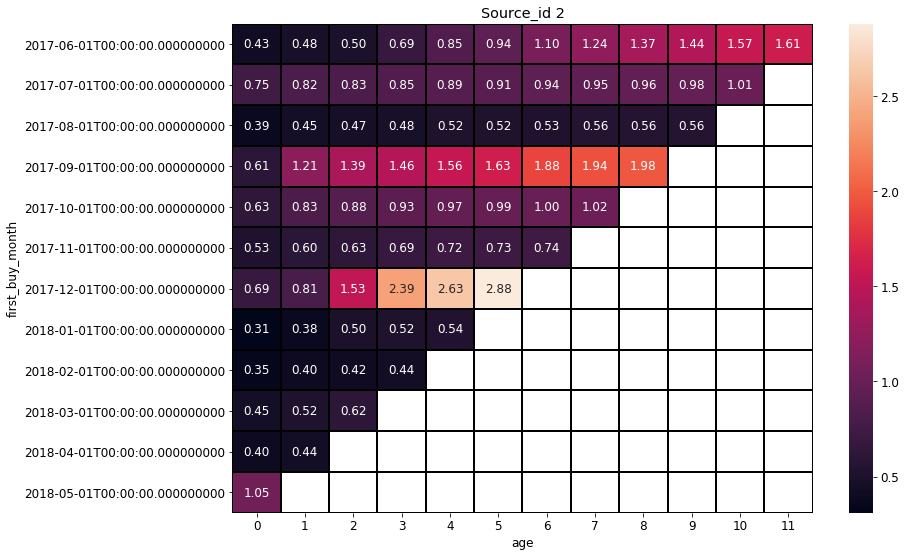

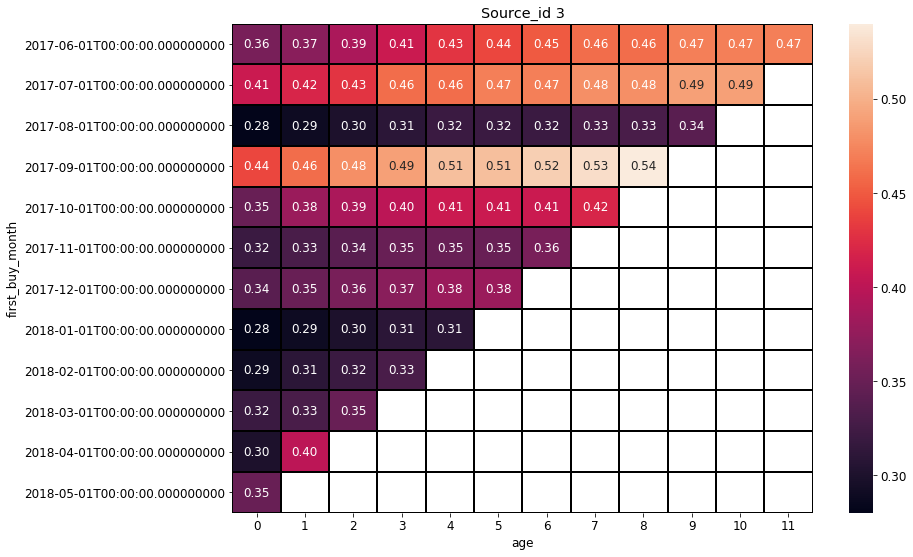

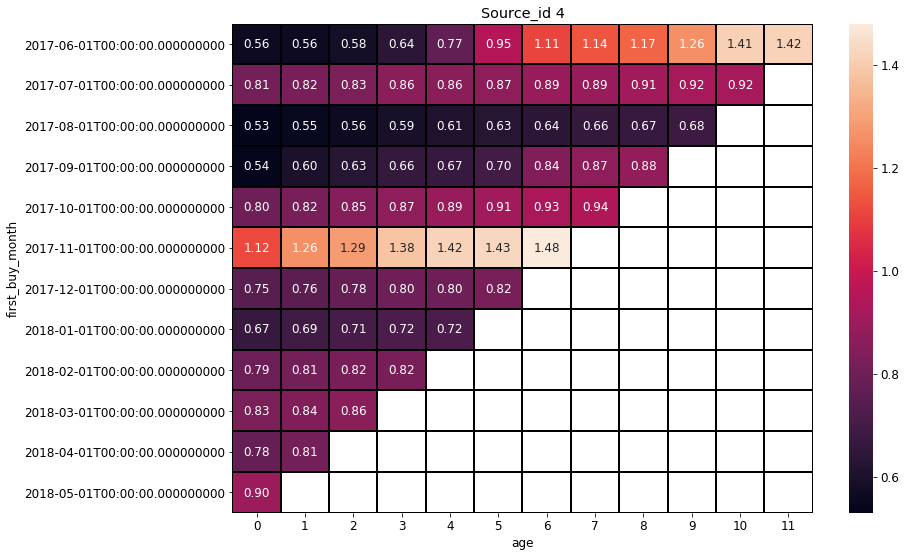

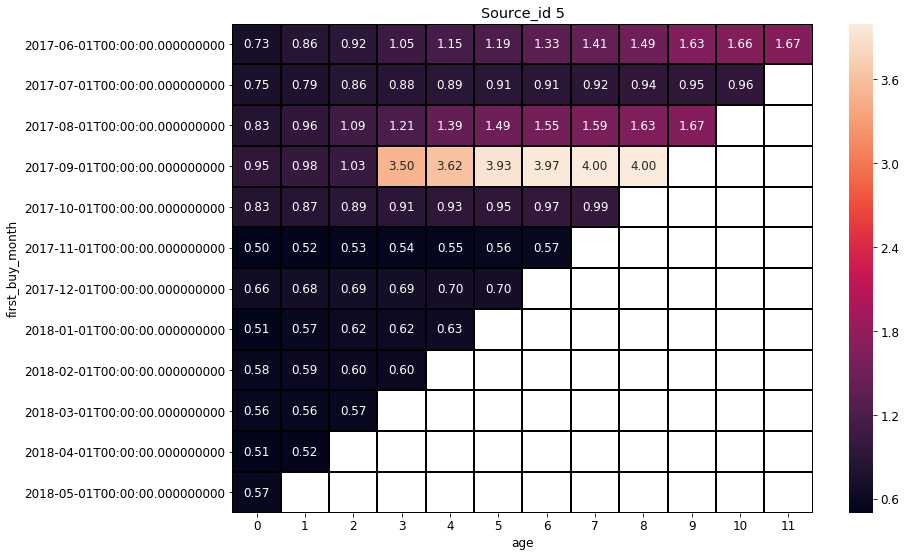

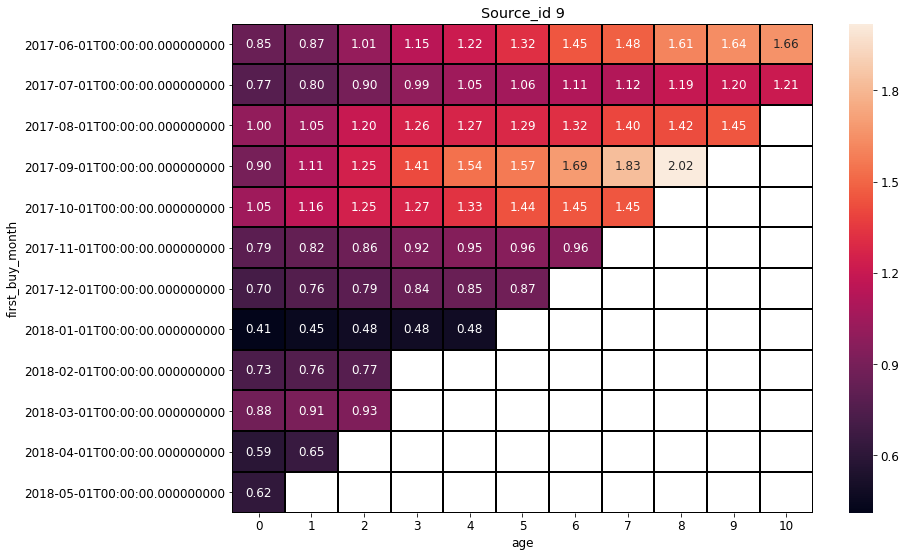

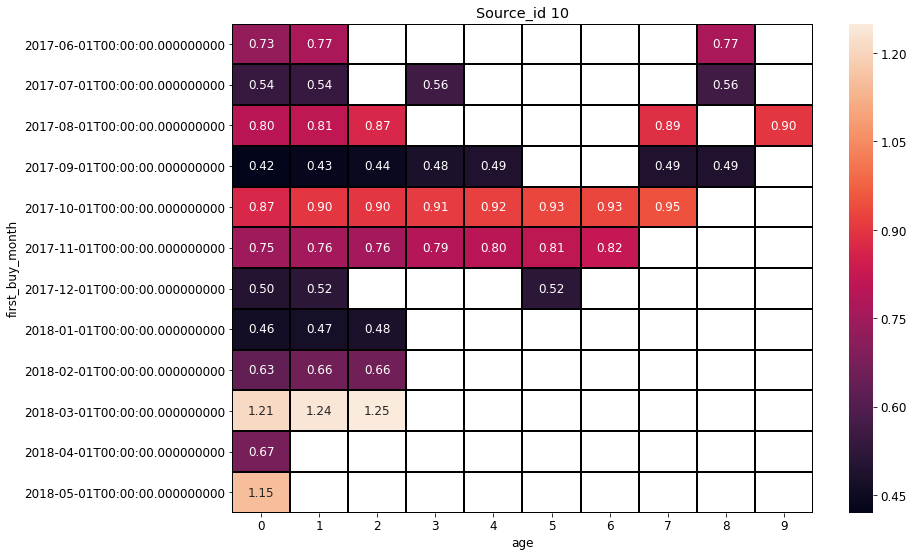

In [100]:
for i in source_id['source_id']:
    report_new_source_slice = report_new_source[report_new_source['source_id']==i]
    output = report_new_source_slice.pivot_table(
        index='first_buy_month', columns='age', values='romi', aggfunc='mean'
    )
    plt.figure(figsize=(13,9))
    plt.title('Source_id'+' '+ str(i))
    sns.heatmap(output.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=1, linecolor='black')

Из данных выше можно сделать вывод, что ресурс 1 достаточно эффективен в привлечении и окупаемости вложений. Первые 6 когорт окупились в первый или второй месяц, также 10-я. Последняя когорта в первый же месяц показала окупаемость 0,86, при этом те когорты, в которые низкая скорость окупаемости компенсируются окупаемостью первых когорт. При этом если вернуться к графику затрат на этот канал, то они ниже чем у 2-го и 3-го.   

По второму источнику не так все однозначно, в целом 6 из 12 когорт окупились, при этом это те когорты, в которых 0 месяц жизни приходится на наиболее популярные месяцы для этого сегмента, особенно декабрь. Есть смысл снизить расходы на привлечение пользователей по данному каналу в месяцы, когда это менее актуально и увеличивать расходы на привлечение в пиковые месяцы. В последней когорте окупаемость в первый же месяц составила 1,05, а по графику расходов видно, что они резко снизились. Т.е. при меньших расходах данный канал эффективен.

Ресурс 3 крайне затратный и неэффективен ни в одной из когорт, я бы рекомендовал сократить расходы минимум вдвое и посмотрел бы есть ли окупаемость, если же окупаемость останется на уровне 50% от вложений, то сократил бы расходы на этот канал до минимума.   

Аналогично 2 му ресурсу, в четвертом ресурсе когорта 11.2017 показала высокую эффективность, т.к. были существенно сокращены расходы на маркетинг по данному ресурсу, при этом покупки не снизились, далее расходы возросли, при этом последующие когорты вышли на близкие к 1 значения, но так и не окупились, рекомендовал бы снизить расходы до прежнего уровня.

В 5 источнике расходы растут, а окупаемость нет, первые когорты выходили на окупаемость, далее после 4 когорты ни одна не вышла на окупаемость, при это показатель не превышает 0.6, рекомендовал бы проанализировать источник, возможно он стал менее эффективным каналом привлечения и следует снизить расходы на него.   

Если рассматривать 9 канал, то первые пять когорт окупились, шестая близка к этому, далее идет падение, если связать с расходами, видно, что как только расходы на этот канал возросли, сразу же снизилась окупаемость, рекомендуется снизить расходы до прежнего уровня.   


В 10 источнике видно, что покупатель крайне редко совершает покупки, видимо этот ресурс привлекает менее целевую аудиторию, но в последних когортах окупаемость выше 1, при этом расходы снижены в эти месяца, следовательно данный канал нужно удерживать на данном уровне расходов.


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, окупаемость источников детально проанализирована.
</div>

## Выводы

1. Ресурс 1 достаточно эффективен в привлечении и окупаемости вложений. Первые 6 когорт окупились в первый или второй месяц, также 10-я. Последняя когорта в первый же месяц показала окупаемость 0,86, при этом те когорты, в которые низкая скорость окупаемости компенсируются окупаемостью первых когорт. При этом если вернуться к графику затрат на этот канал, то они ниже чем у 2-го и 3-го.
2. По второму источнику не так все однозначно, в целом 6 из 12 когорт окупились, при этом это те когорты, в которых 0 месяц жизни приходится на наиболее популярные месяцы для этого сегмента, особенно декабрь. Есть смысл снизить расходы на привлечение пользователей по данному каналу в месяцы, когда это менее актуально и увеличивать расходы на привлечение в пиковые месяцы. В последней когорте окупаемость в первый же месяц составила 1,05, а по графику расходов видно, что они резко снизились. Т.е. при меньших расходах данный канал эффективен.
3. Ресурс 3 крайне затратный и неэффективен ни в одной из когорт, я бы рекомендовал сократить расходы минимум вдвое и посмотрел бы есть ли окупаемость, если же окупаемость останется на уровне 50% от вложений, то сократил бы расходы на этот канал до минимума.
4. Аналогично 2 му ресурсу, в четвертом ресурсе когорта 11.2017 показала высокую эффективность, т.к. были существенно сокращены расходы на маркетинг по данному ресурсу, при этом покупки не снизились, далее расходы возросли, при этом последующие когорты вышли на близкие к 1 значения, но так и не окупились, рекомендовал бы снизить расходы до прежнего уровня.
5. В 5 источнике расходы растут, а окупаемость нет, первые когорты выходили на окупаемость, далее после 4 когорты ни одна не вышла на окупаемость, при это показатель не превышает 0.6, рекомендовал бы проанализировать источник, возможно он стал менее эффективным каналом привлечения и следует снизить расходы на него.
6. Если рассматривать 9 канал, то первые пять когорт окупились, шестая близка к этому, далее идет падение, если связать с расходами, видно, что как только расходы на этот канал возросли, сразу же снизилась окупаемость, рекомендуется снизить расходы до прежнего уровня.
7. В 10 источнике видно, что покупатель крайне редко совершает покупки, видимо этот ресурс привлекает менее целевую аудиторию, но в последних когортах окупаемость выше 1, при этом расходы снижены в эти месяца, следовательно данный канал нужно удерживать на данном уровне расходов.
8. Из метрик видно, что уникальных ползоваетелей, заходящих в день 5193, при этом в неделю 5716, что говорит о частом использовании приложения одними и теми же пользователями. Stiky factor = 5193/5716 = 91%, очень высокая частота обращений. При количестве уникальных пользователей в месяц 23228, stiky factor = 5193/23228 = 22%, что говорит о достаточно частом использовании. Со временем привлекается все больше пользователей на сайт, но % удержания снижается, при этом на второй месяц жизни когорт в среднем повторно заходит 4,78% пользователей. Среднее посещение в день одним пользователем сайта 1,1, т.е. каждый десятый заходит 2 раза. Среднее время препровождения пользователем на сайте (ASL) 60 секунд. В абсолютно всех когортах % падения RR приходится на последние 2 месяца, при этом наиболее высокий процент удержания у первых двух когорт. Это может говорить о том, что в этот период идет резкий спад интереса по данному контенту, также возможно появился мощный конкурент или снизилась эффективность рекламы.
9. Большинство пользователей совершает первую покупку в пределах двух часов, однако есть часть пользователей (около 10000 пользователей, что составляет ~ 10% от всех пользователей), которым требуется 20 дней на приянтие решения. Рекомендуется исследовать эту когорту и создать ряд стимулирующих мероприятий для увеличения скорости покупки. (рассылка, акции и прочее). В среднем пользователь совершает 1,74 покупки, при этом в разрезе когорт видно, что первая когорта намного больше совершает заказов, относительно последующих, больше 3-х. А к примеру 4 когорта в двух из четырех месяцев не совершала покупки вовсе. Это может говорить о том, что возможно изменилось что-то в части программного обеспечения и новые пользователи хуже понимают интерфейс, первые же пользователи успешно продолжают пользоваться, возможно изменилось обучение использованию или навигация. Если смотреть средний чек в разрезе каждого часа, то наибольшие средние чеки в 8 утра и 21 вечера. При этом средний чек в целом составляет 5.48 у.е., также в те часы, когда средний чек выше 5 у.е. являются наиболее активными среди покупателей, поэтому средний чек - это преимущественно вечерние часы.
10. В когортах, которые прожили 6 месяцев и более: на шестой месяц кумулятивная ltv в среднем составляет 7.97 у.е., т.е. в течение 6 месяцев пользователь в среднем приносит такую сумму сайту. Заметно, что первая, четвертая и седьмая когорты более интенсивно прирастают, нежели остальные. Это связано с сезонностью и маркетинговой активностью, шаг в три месяца. Также в когорте 4 на 4 месяце (в декабре) видна высокая средняя выручка на человека, это может быть связано с маркетинговым предложением перед новым годом для данной когорты, что создало эффективный прирост продаж.


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Молодец, что детально описал основные результаты проекта и объяснил возможные причины выявленных закономерностей.
</div>